In [1]:
%matplotlib inline
import matplotlib
import pandas as pd
import numpy as np
from scipy import stats  
from scipy.stats import iqr
import seaborn as sns
import math

In [2]:
data = pd.read_csv("/Users/rakip/Desktop/Course_Work_MS/r2z1.csv")
alpha = 0.1
U = data['X'] - data['Y']
size = len(U)
mean = data['X'].sum()/size -data['Y'].sum()/size 

dispersion_non = U.var() #несмещённая
print(dispersion_non)

dispersion = sum([(xi - mean) ** 2 for xi in U]) / len(U)  # смещённая
df = (size - 1)
print("size", size, '\nmean\n', mean, '\ndispersion\n', dispersion, '\ndegrees of freedom', df)

51.64182040531094
size 54 
mean
 -8.931481481481484 
dispersion
 50.685490397805175 
degrees of freedom 53


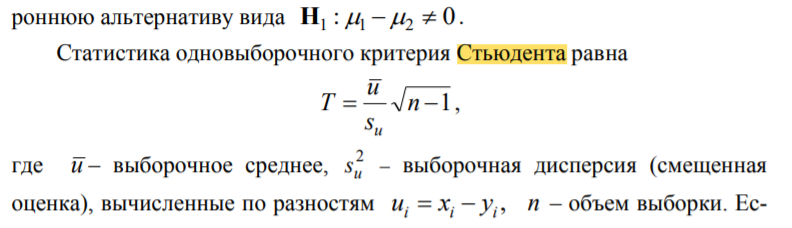

Для нашего случая критическая область будет T<Cкрит, т.к. H1: u(x) - u(y) < 0

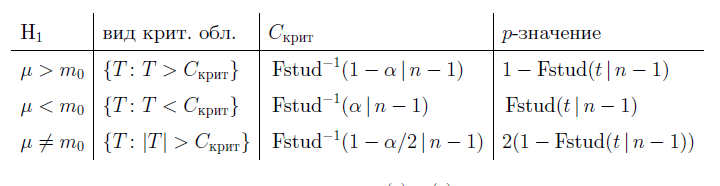

In [7]:
C_critical1 = stats.t.ppf(alpha, df)
print('C_critical', C_critical1)

T = (mean/math.sqrt(dispersion))*math.sqrt(df)
print('\nT_statistic', T)
print()

print('для одной выборки', stats.ttest_1samp(U, 0))
#T<Cкрит => отвергаем H0 и принимаем H1

C_critical -1.297729842630205

T_statistic -9.133129392528337

для одной выборки Ttest_1sampResult(statistic=-9.133129392528334, pvalue=1.816446265965713e-12)


In [13]:
print('для крит. область T<C: p-value =', stats.t.cdf(T, df))
# a < p  значит нулевая гипотеза принимается, (данные не попадают в критическую область)
# a > p нулевая гипотеза будет отвергаться (данные попадают в критическую область)
# p < 0.01 — высоко значимое расхождение с гипотезой;

для крит. область T<C: p-value = 9.082231329828436e-13
